<a href="https://colab.research.google.com/github/nikkii03/Handwritten_Maths_Evaluator/blob/main/calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculator


In [23]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from itertools import groupby

Recognising image and converting it to string

In [24]:
def pred(test_image) :
  image = Image.open(test_image).convert("L")
  width = image.size[0]                                             #resizing to 28 pixels
  height = image.size[1]
  ratio = width / height
  w = int(ratio * 28)
  h = 28
  new_image = image.resize((w, h))

  image_arr = np.array(new_image)                                   #converting to a numpy array
  inv_image_arr = 255 - image_arr
  test_image_arr = inv_image_arr / 255.0                            #rescaling the image

  #splitting image array into individual digit arrays
  a = test_image_arr.any(0)
  out = [test_image_arr[:,[*g]] for k, g in groupby(np.arange(len(a)), lambda x: a[x] != 0) if k]

  num_of_elements = len(out)
  elements_list = []

  for i in range(0, num_of_elements):

    j = out[i]
    #adding 0 value columns as fillers
    width1 = j.shape[1]
    f = (test_image_arr.shape[0] - width1) / 2
    
    if f.is_integer() == False:    
        fl = int(f)
        fr = int(f) + 1
    else:                              
        fl = int(f)
        fr = int(f)
    
    arr_l = np.zeros((test_image_arr.shape[0], fl)) #left fillers
    arr_r = np.zeros((test_image_arr.shape[0], fr)) #right fillers
    help_ = np.concatenate((arr_l, j), axis= 1)
    element_arr = np.concatenate((help_, arr_r), axis= 1)
    
    element_arr.resize(28, 28, 1) #resize array 2d to 3d

    #storing all elements in a list
    elements_list.append(element_arr)


    elements_array = np.array(elements_list)

    'reshaping to fit model input criteria'
    elements_array = elements_array.reshape(-1, 28, 28, 1)

    'predicting using the model'
    model = keras.models.load_model("model.h5")
    elements_pred =  model.predict(elements_array)
    elements_pred = np.argmax(elements_pred, axis = 1)
  print(elements_pred)
  return(elements_pred)
  

BODMAS

In [25]:
def bodmas(image_name):
  elements_pred = pred(image_name)

  op = {
            10,   # = "/"
            11,   # = "+"
            12,   # = "-"
            13    # = "*"
        }   
      
  m_exp = []
  temp = []
          
  'creating a list separating all elements'
  for item in elements_pred:
      if item not in op:
          temp.append(item)
      else:
          m_exp.append(temp)
          m_exp.append(item)
          temp = []
  if temp:
      m_exp.append(temp)
          
  print(m_exp)    
  'converting the elements to numbers and operators'
  i = 0
  num = 0
  for item in m_exp:
      if type(item) == list:
          if not item:
              m_exp[i] = ""
              i = i + 1
          else:
              num_len = len(item)
              for digit in item:
                  num_len = num_len - 1
                  num = num + ((10 ** num_len) * digit)
              m_exp[i] = str(num)
              num = 0
              i = i + 1
      else:
          m_exp[i] = str(item)
          m_exp[i] = m_exp[i].replace("10","/")
          m_exp[i] = m_exp[i].replace("11","+")
          m_exp[i] = m_exp[i].replace("12","-")
          m_exp[i] = m_exp[i].replace("13","*")
              
          i = i + 1
      
  'joining the list of strings to create the mathematical expression'
  separator = ' '
  m_exp_str = separator.join(m_exp)
      
  'calculating the mathematical expression using eval()'
  while True:
      try:
          answer = eval(m_exp_str)    #evaluating the answer
          answer = round(answer, 2)
          equation  = m_exp_str + " = " + str(answer)
          print(equation)   #printing the equation
          break

      except SyntaxError:
          print("Invalid predicted expression!!")
          print("Following is the predicted expression:")
          print(m_exp_str)
          break

Normal Caluculation

In [26]:
def calculate(image_name):
  elements_pred = pred(image_name)
    
  op = {
        10,   # = "/"
        11,   # = "+"
        12,   # = "-"
        13    # = "*"
        }   
      
  m_exp = []
  temp = []
          
  'creating a list separating all elements'
  for item in elements_pred:
      if item not in op:
          temp.append(item)
      else:
          m_exp.append(temp)
          m_exp.append(item)
          temp = []
  if temp:
      m_exp.append(temp)
          
  'converting the elements to numbers and operators'
  i = 0
  num = 0
  for item in m_exp:
      if type(item) == list:
          if not item:
              m_exp[i] = ""
              i = i + 1
          else:
              num_len = len(item)
              for digit in item:
                  num_len = num_len - 1
                  num = num + ((10 ** num_len) * digit)
              m_exp[i] = str(num)
              num = 0
              i = i + 1
      else:
          m_exp[i] = str(item)
          m_exp[i] = m_exp[i].replace("10","/")
          m_exp[i] = m_exp[i].replace("11","+")
          m_exp[i] = m_exp[i].replace("12","-")
          m_exp[i] = m_exp[i].replace("13","*")
              
          i = i + 1
  print(m_exp)
  separator = ' '
  m_exp_str = separator.join(m_exp)

  i=0
  ans = 0.0
  for x in m_exp:
    if x == '/':
      ans = float(m_exp[i-1])/float(m_exp[i+1])
      m_exp[i+1] = ans
    elif x == '*':
      ans = float(m_exp[i-1])*float(m_exp[i+1])
      m_exp[i+1] = ans
    elif x == '+':
      ans = float(m_exp[i-1])+float(m_exp[i+1])
      m_exp[i+1] = ans
    elif x == '-':
      ans = float(m_exp[i-1])-float(m_exp[i+1])
      m_exp[i+1] = ans
    i=i+1
  ans = round(ans,2)
  print(ans)
  print(m_exp_str +" = "+ str(ans))

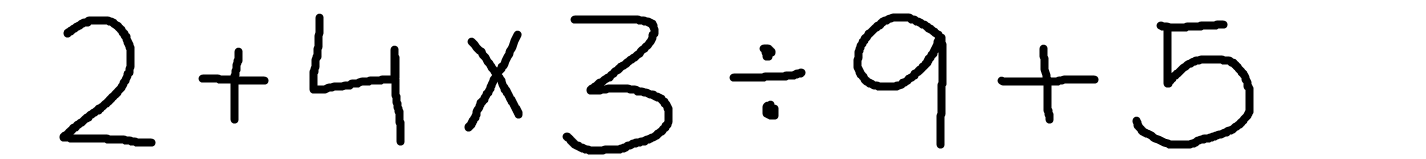

In [27]:
#from pred import pred, calculate
from PIL import Image
image = Image.open('test6.png').convert('L')
image

In [28]:
calculate('test6.png')

[ 2 11  4 13  3 10  9 11  5]
['2', '+', '4', '*', '3', '/', '9', '+', '5']
7.0
2 + 4 * 3 / 9 + 5 = 7.0


In [29]:
bodmas('test6.png')

[ 2 11  4 13  3 10  9 11  5]
[[2], 11, [4], 13, [3], 10, [9], 11, [5]]
2 + 4 * 3 / 9 + 5 = 8.33
